In [1]:
## Import all modules
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pygrib
import cartopy.feature as cfeature
import metpy.calc as mpcalc
from metpy.units import units
import cfgrib

from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
from metpy.plots import USCOUNTIES

## Import all modules
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pygrib
import cartopy.feature as cfeature
import metpy.calc as mpcalc
from metpy.units import units
import cfgrib
import cartopy
import scipy

from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
from matplotlib.patches import Rectangle

/Users/kem6245/anaconda3/envs/sharppy-envs/lib/python3.11/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()
/Users/kem6245/anaconda3/envs/sharppy-envs/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.26.0
  warnings.warn(


In [2]:
## Load in our File

## Only concerned with 2 June 2022 right now
p = '/Users/kem6245/Documents/Python Copy/ESCAPE/RAP_Data/Both_Data/RAP Data/Mode 1/rap_130_20220602_0900_000.grb2'
#p = '/Users/kem6245/Documents/Python Copy/ESCAPE/RAP_Data/Both Mode 1 RAP Comp/RAP/rap_130_20220602_1200_000.grb2'

data = xr.open_mfdataset(p, engine='cfgrib', backend_kwargs={'filter_by_keys':{'typeOfLevel': 'isobaricInhPa', 'level': 500.0}},
                         combine = 'nested', concat_dim = 'valid_time')


Ignoring index file '/Users/kem6245/Documents/Python Copy/ESCAPE/RAP_Data/Both_Data/RAP Data/Mode 1/rap_130_20220602_0900_000.grb2.9810b.idx' incompatible with GRIB file
/Users/kem6245/anaconda3/envs/sharppy-envs/lib/python3.11/site-packages/cfgrib/xarray_plugin.py:123: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


In [5]:
## we want to create means from all of our RAP data
ds = data.mean(dim='valid_time', keep_attrs = True).load()

## This would show us the data if we need it
ds



<xarray.Dataset> Size: 7MB
Dimensions:        (y: 337, x: 451)
Coordinates:
    time           datetime64[ns] 8B 2022-06-02T09:00:00
    step           timedelta64[ns] 8B 00:00:00
    isobaricInhPa  float64 8B 500.0
    latitude       (y, x) float64 1MB 16.28 16.31 16.34 ... 55.54 55.51 55.48
    longitude      (y, x) float64 1MB 233.9 234.0 234.1 ... 302.3 302.4 302.6
Dimensions without coordinates: y, x
Data variables:
    gh             (y, x) float32 608kB 5.852e+03 5.851e+03 ... 5.568e+03
    t              (y, x) float32 608kB 269.1 269.1 269.1 ... 255.8 255.9 256.0
    r              (y, x) float32 608kB 8.876 8.751 8.751 ... 34.38 28.25 23.0
    w              (y, x) float32 608kB -0.03702 -0.03702 ... 0.08798 0.08798
    u              (y, x) float32 608kB 4.264 4.077 3.889 ... -6.736 -6.986
    v              (y, x) float32 608kB -1.326 -1.514 -1.639 ... -10.39 -10.51
    absv           (y, x) float32 608kB 7.987e-06 1.299e-05 ... 0.000128 0.00012
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-06-11T14:55 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
def plot_maxmin_points(lon, lat, data, extrema, nsize, symbol, color='k',
                       plotValue=True, transform=None):
    """
    This function will find and plot relative maximum and minimum for a 2D grid. The function
    can be used to plot an H for maximum values (e.g., High pressure) and an L for minimum
    values (e.g., low pressue). It is best to used filetered data to obtain  a synoptic scale
    max/min value. The symbol text can be set to a string value and optionally the color of the
    symbol and any plotted value can be set with the parameter color
    lon = plotting longitude values (2D)
    lat = plotting latitude values (2D)
    data = 2D data that you wish to plot the max/min symbol placement
    extrema = Either a value of max for Maximum Values or min for Minimum Values
    nsize = Size of the grid box to filter the max and min values to plot a reasonable number
    symbol = String to be placed at location of max/min value
    color = String matplotlib colorname to plot the symbol (and numerica value, if plotted)
    plot_value = Boolean (True/False) of whether to plot the numeric value of max/min point
    The max/min symbol will be plotted on the current axes within the bounding frame
    (e.g., clip_on=True)
    """
    from scipy.ndimage.filters import maximum_filter, minimum_filter

    if (extrema == 'max'):
        data_ext = maximum_filter(data, nsize, mode='nearest')
    elif (extrema == 'min'):
        data_ext = minimum_filter(data, nsize, mode='nearest')
    else:
        raise ValueError('Value for hilo must be either max or min')

    mxy, mxx = np.where(data_ext == data)

    for i in range(len(mxy)):
        txt = ax.text(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]], symbol, color=color, size=24,
                clip_on=True, horizontalalignment='center', verticalalignment='center',
                transform=transform)
        txt.set_clip_box(ax.bbox)
        txt2 = ax.text(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]],
                '\n' + str(int(data[mxy[i], mxx[i]])),
                color=color, size=12, clip_on=True, fontweight='bold',
                horizontalalignment='center', verticalalignment='top', transform=transform)
        txt2.set_clip_box(ax.bbox)

In [6]:
## Get our u and v data
u = ds.u.metpy.quantify().metpy.convert_units('knot')
v = ds.v.metpy.quantify().metpy.convert_units('knot')
w = ds.w.metpy.quantify()

print(u.shape)

(337, 451)


/var/folders/pc/3868n6_s5wggqvvzx3s5l2p80000gq/T/ipykernel_15855/3495076183.py:2: DeprecationWarning: Please import `maximum_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import maximum_filter, minimum_filter
/var/folders/pc/3868n6_s5wggqvvzx3s5l2p80000gq/T/ipykernel_15855/3495076183.py:2: DeprecationWarning: Please import `minimum_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import maximum_filter, minimum_filter


(337, 451)


/var/folders/pc/3868n6_s5wggqvvzx3s5l2p80000gq/T/ipykernel_15855/3694535083.py:20: DeprecationWarning: Please import `maximum_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import maximum_filter, minimum_filter
/var/folders/pc/3868n6_s5wggqvvzx3s5l2p80000gq/T/ipykernel_15855/3694535083.py:20: DeprecationWarning: Please import `minimum_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import maximum_filter, minimum_filter


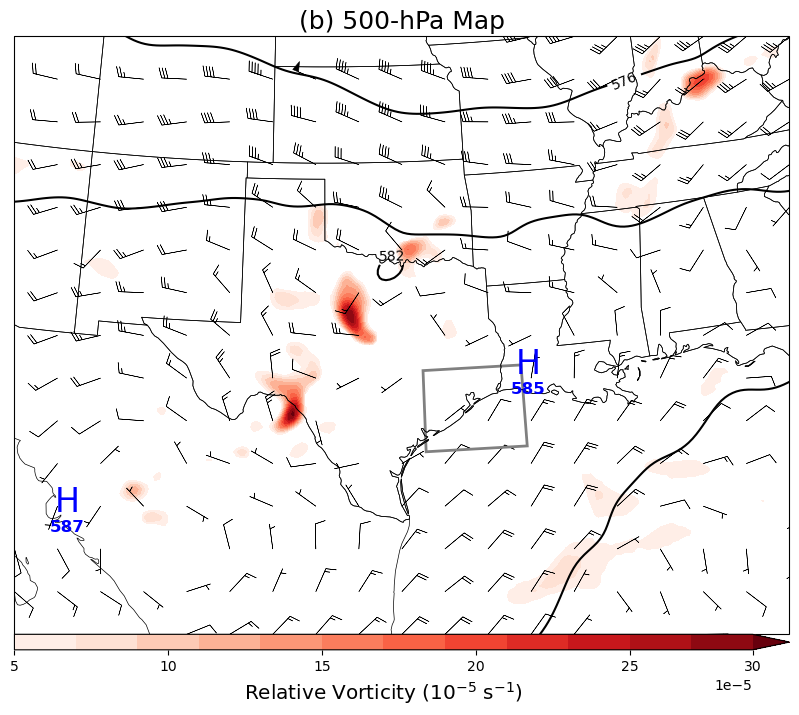

In [10]:
## Make a 500 geopotential heights Map
from scipy.ndimage.filters import maximum_filter, minimum_filter
## First we need to define our coordinate system and add all our map features
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)
fig = plt.figure(figsize = (10,10))
#fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111, projection = crs)
##ax.set_extent([235., 290., 20., 55.])
#ax.set_extent([-91., -108., 25., 36.])
ax.set_extent([250., 275., 22., 40.])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
small_extent = [-93, -96.5 ,28, 30.5]
lon_min, lon_max, lat_min, lat_max = small_extent
rect = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min, linewidth = 2, edgecolor = 'grey', facecolor = 'none', transform = ccrs.PlateCarree())

lons, lats = ds.longitude.values, ds.latitude.values

## Get the heights and smooth so that it's not wobbly
gh = mpcalc.smooth_gaussian((ds.gh.values)/10. , 20) ## want it in decometers; 9 is smoothing value (typically between 6 and 12)
print(gh.shape)
cs = ax.contour(lons, lats, gh, levels = np.arange(420, 660, 6), colors = 'k', transform = ccrs.PlateCarree())
## contour labels 
plt.clabel(cs)

## Calculate and plot relative voriticyt 
dx, dy = mpcalc.lat_lon_grid_deltas(lons, lats)
vor_500 = mpcalc.smooth_gaussian(mpcalc.vorticity(u, v, dx=dx, dy=dy).metpy.convert_units('1/s').data.magnitude, 30)
vor_500 = mpcalc.vorticity(u, v, dx=dx, dy=dy).metpy.convert_units('1/s').data.magnitude
vor_500[vor_500 < 1e-5] = np.nan
cfv = ax.contourf(lons, lats, vor_500, cmap = 'Reds', levels = np.arange(5e-5, 3.01e-4, 20e-6), vmin = 5e-5, vmax = 3e-4, extend = "max",
                 transform = ccrs.PlateCarree())

## Create the colorbar for relative vorticity
cb2=fig.colorbar(cfv, ax=ax, orientation='horizontal', pad=0, aspect=50)
cb2.set_ticks(np.arange(5e-5, 3.01e-4, 5e-5))
cb2.set_label(r'Relative Vorticity ($10^{-5}$ s$^{-1}$)', size='x-large')
cb2.formatter.set_scientific(True)
cb2.formatter.set_powerlimits((-5,-5))
cb2.update_ticks()

## Calculate and plot vertical vorticity

#w = ds.w.metpy.quantify()
#cfr = ax.contourf(lons, lats, w.data.magnitude, cmap = 'RdBu', levels = np.arange(-1, 1.1, 0.1), vmin = -1, vmax = 1.2,
                 # transform = ccrs.PlateCarree(), extend = "both")
    
## Create the colorbar for relative vorticity
#cb2=fig.colorbar(cfr, ax=ax, orientation='horizontal', pad=0, aspect=50)
#cb2.set_label(r'Omega Pa/s', size='x-large')

## u and v windbarbs
ax.barbs(lons, lats, u.data.magnitude, v.data.magnitude, regrid_shape=15, length = 6, linewidth = 0.4,  
         sizes = {'emptybarb': 0}, transform = ccrs.PlateCarree())

## for high/low pressure systems
plot_maxmin_points(lons, lats, gh, extrema = 'max', nsize = 50, symbol = 'H', color = 'b',
                   plotValue=False, transform= ccrs.PlateCarree())

plot_maxmin_points(lons, lats, gh, extrema = 'min', nsize = 50, symbol = 'L', color = 'r',
                   plotValue=False, transform= ccrs.PlateCarree())
ax.add_patch(rect)
ax.set_title('(b) 500-hPa Map',fontsize = 18)

#plt.savefig('/Users/kem6245/Documents/Python Copy/ESCAPE/ESCAPE_Figures/Paper 2/2June22_500_composite_vort_9Z.png', dpi = 300)
plt.savefig('/Users/kem6245/Documents/Python Copy/ESCAPE/ESCAPE_Figures/Paper 2/2June22_500_composite_w_9Z_updated.png', dpi = 300)

In [53]:
p = '/Users/kem6245/Documents/Python Copy/ESCAPE/RAP_Data/Both_Data/RAP Data/Mode 1/rap_130_20220602_0900_000.grb2'
#p = '/Users/kem6245/Documents/Python Copy/ESCAPE/RAP_Data/Both Mode 1 RAP Comp/RAP/rap_130_20220602_1200_000.grb2'

## WE want to open our data. This is for the 850 geopotential height level
data = xr.open_mfdataset(p, engine='cfgrib', backend_kwargs={'filter_by_keys':{'typeOfLevel': 'isobaricInhPa', 'level': 850.0}},
                         combine = 'nested', concat_dim = 'valid_time')

ds = data.mean(dim='valid_time', keep_attrs = True).load()
## Get our u and v data
u = ds.u.metpy.quantify().metpy.convert_units('knot')
v = ds.v.metpy.quantify().metpy.convert_units('knot')

Ignoring index file '/Users/kem6245/Documents/Python Copy/ESCAPE/RAP_Data/Both_Data/RAP Data/Mode 1/rap_130_20220602_0900_000.grb2.9c67f.idx' incompatible with GRIB file


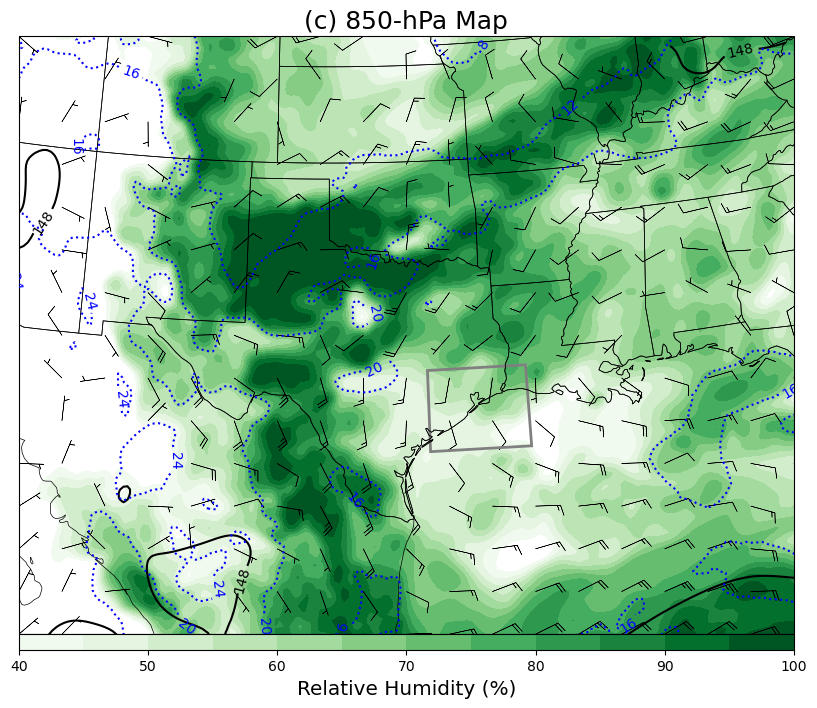

In [54]:
## Make a 850 geopotential heights Map

## First we need to define our coordinate system and add all our map features
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = crs)
extent = [250., 275., 22., 40.]
ax.set_extent(extent)

ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

small_extent = [-93, -96.5 ,28, 30.5]
lon_min, lon_max, lat_min, lat_max = small_extent
rect = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min, linewidth = 2, edgecolor = 'grey', facecolor = 'none', transform = ccrs.PlateCarree())
 
ds_zoom = ds.where(np.logical_and( 
                        np.logical_and(ds.longitude.values <= 280, ds.longitude.values >= 245), 
                        np.logical_and(ds.latitude.values <= 41, ds.latitude.values >= 18)))

lons, lats = ds_zoom.longitude.values, ds_zoom.latitude.values

## Get the heights and smooth so that it's not wobbly
gh = mpcalc.smooth_gaussian((ds_zoom.gh.values)/10. , 20) ## want it in decometers; 9 is smoothing value (typically between 6 and 12)
cs = ax.contour(lons, lats, gh, levels = np.arange(100, 250, 6), colors = 'k', transform = ccrs.PlateCarree())
## contour labels 
plt.clabel(cs)

## Show relative humidity
## For research plot, use 1 for the arange
## For regular plot, use 10
r = ds_zoom.r.metpy.quantify()
cfr = ax.contourf(lons, lats, r.data.magnitude, cmap = 'Greens', levels = np.arange(40, 101, 5), vmin = 40, vmax = 101,
                  transform = ccrs.PlateCarree())

cb2=fig.colorbar(cfr, ax=ax, orientation='horizontal', pad=0, aspect=50)
cb2.set_label('Relative Humidity (%)', size='x-large')

## Show temperature contours
temp = ds_zoom.t.metpy.quantify().metpy.convert_units('degC')
plottemp = ax.contour(lons, lats, temp.data.magnitude, levels = np.arange(-40,40,4), vmin = -40, vmax = 40,
             colors='b', linestyles='dotted', transform=ccrs.PlateCarree())
plt.clabel(plottemp)

## u and v windbarbs
ax.barbs(lons, lats, u.data.magnitude, v.data.magnitude, regrid_shape=15, length = 6, linewidth = 0.4,  
         sizes = {'emptybarb': 0}, transform = ccrs.PlateCarree())
ax.add_patch(rect)
ax.set_title('(c) 850-hPa Map',fontsize = 18)

##plt.savefig('/apple/s0/kem6245/escape/ESCAPE_Figures/Composite Synoptic/Gulf_850_composite')
plt.savefig('/Users/kem6245/Documents/Python Copy/ESCAPE/ESCAPE_Figures/Paper 2/2June22_850_composite_9Z.png', dpi = 300)


In [11]:
p = '/Users/kem6245/Documents/Python Copy/ESCAPE/RAP_Data/Both_Data/RAP Data/Mode 1/rap_130_20220602_0900_000.grb2'
#p = '/Users/kem6245/Documents/Python Copy/ESCAPE/RAP_Data/Both Mode 1 RAP Comp/RAP/rap_130_20220602_1200_000.grb2'

## WE want to open our data. This is for the 850 geopotential height level
data = xr.open_mfdataset(p, engine='cfgrib', backend_kwargs={'filter_by_keys':{'typeOfLevel': 'isobaricInhPa', 'level': 250.0}},
                         combine = 'nested', concat_dim = 'valid_time')

## we want to create means from all of our RAP data
ds = data.mean(dim='valid_time', keep_attrs = True).load()
## Get our u and v data
u = ds.u.metpy.quantify().metpy.convert_units('knot')
v = ds.v.metpy.quantify().metpy.convert_units('knot')

Ignoring index file '/Users/kem6245/Documents/Python Copy/ESCAPE/RAP_Data/Both_Data/RAP Data/Mode 1/rap_130_20220602_0900_000.grb2.9810b.idx' incompatible with GRIB file
/Users/kem6245/anaconda3/envs/sharppy-envs/lib/python3.11/site-packages/cfgrib/xarray_plugin.py:123: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


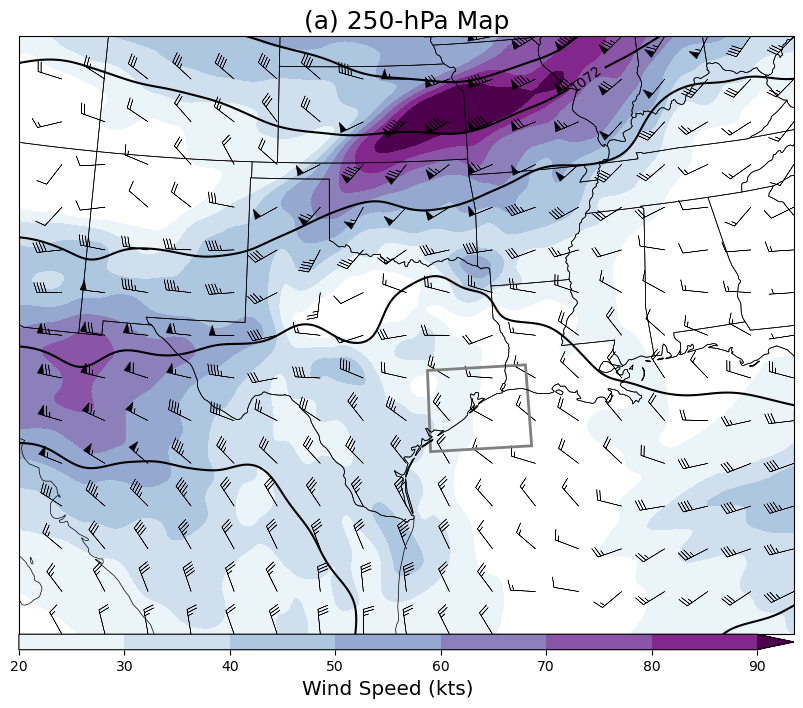

In [12]:
## Make a 250 geopotential heights Map

## First we need to define our coordinate system and add all our map features
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = crs)
#ax.set_extent([235., 290., 20., 55.])
ax.set_extent([250., 275., 22., 40.])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
small_extent = [-93, -96.5 ,28, 30.5]
lon_min, lon_max, lat_min, lat_max = small_extent
rect = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min, linewidth = 2, edgecolor = 'grey', facecolor = 'none', transform = ccrs.PlateCarree())
 

lons, lats = ds.longitude.values, ds.latitude.values

## Get the heights and smooth so that it's not wobbly
dx, dy = mpcalc.lat_lon_grid_deltas(lons, lats)
gh = mpcalc.smooth_gaussian((ds.gh.values)/10. , 20) ## want it in decometers; 9 is smoothing value (typically between 6 and 12)
cs = ax.contour(lons, lats, gh, levels = np.arange(1000, 1200, 6), colors = 'k', transform = ccrs.PlateCarree())
## contour labels 
plt.clabel(cs)

## Show divergence
##div = mpcalc.smooth_gaussian(mpcalc.divergence(u, v, dx=dx, dy=dy).metpy.convert_units('1/s').data.magnitude, 10)
speed = mpcalc.wind_speed(u, v)
wind = np.arange(50, 250, 20)
windjet = ax.contourf(lons, lats, speed, wind, cmap=plt.cm.BuPu, levels = np.arange(20,100, 10), vmin = 20, vmax = 100,
                  transform = ccrs.PlateCarree(), extend = "max")
    
##divshade = ax.contourf(lons, lats, div * 1e5, cmap=plt.cm.bwr, vmin = -15, vmax = 15, transform = ccrs.PlateCarree())
## Create the colorbar for relative vorticity
cb2=fig.colorbar(windjet, ax=ax, orientation='horizontal', pad=0, aspect=50)
cb2.set_label('Wind Speed (kts)', size='x-large')
##cb2.set_label('Divergence (1e-5/s)', size='x-large')

## u and v windbarbs
ax.barbs(lons, lats, u.data.magnitude, v.data.magnitude, regrid_shape=15, length = 6, linewidth = 0.4,  
         sizes = {'emptybarb': 0}, transform = ccrs.PlateCarree())

ax.set_title('(a) 250-hPa Map',fontsize = 18)
ax.add_patch(rect)

##plt.savefig('/apple/s0/kem6245/escape/ESCAPE_Figures/Composite Synoptic/Gulf_250_composite')
plt.savefig('/Users/kem6245/Documents/Python Copy/ESCAPE/ESCAPE_Figures/Paper 2/2June22_250_composite_div_9Z_updated.png', dpi=300)

In [14]:
p = '/Users/kem6245/Documents/Python Copy/ESCAPE/RAP_Data/Both_Data/RAP Data/Mode 1/rap_130_20220602_0900_000.grb2'
#p = '/Users/kem6245/Documents/Python Copy/ESCAPE/RAP_Data/Both Mode 1 RAP Comp/RAP/rap_130_20220602_1200_000.grb2'

data = xr.open_mfdataset(p, engine = 'cfgrib', backend_kwargs = {'filter_by_keys':{'stepType': 'instant', 'typeOfLevel': 'pressureFromGroundLayer'}},
                        combine = 'nested', concat_dim = 'valid_time')
dataa = xr.open_mfdataset(p, engine = 'cfgrib', backend_kwargs={'filter_by_keys':{'stepType': 'instant', 'typeOfLevel': 'meanSea'}},
                        combine = 'nested', concat_dim = 'valid_time')

## we want to create means from all of our RAP data
ds = data.mean(dim='valid_time', keep_attrs = True).load()
dsa = dataa.mean(dim='valid_time', keep_attrs = True).load()

press = dsa.mslma.metpy.quantify().metpy.convert_units('hPa')

## Now we want our variables for our other units, but only the surface
temp = ds.t.metpy.quantify().metpy.convert_units('degC')
rh = ds.r.metpy.quantify()
## Get our u and v data
u = ds.u.metpy.quantify().metpy.convert_units('knot')
v = ds.v.metpy.quantify().metpy.convert_units('knot')




Ignoring index file '/Users/kem6245/Documents/Python Copy/ESCAPE/RAP_Data/Both_Data/RAP Data/Mode 1/rap_130_20220602_0900_000.grb2.923a8.idx' incompatible with GRIB file
skipping variable: paramId==260128 shortName='4lftx'
Traceback (most recent call last):
  File "/Users/kem6245/anaconda3/envs/sharppy-envs/lib/python3.11/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/kem6245/anaconda3/envs/sharppy-envs/lib/python3.11/site-packages/cfgrib/dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='pressureFromGroundLayer' value=Variable(dimensions=('pressureFromGroundLayer',), data=array([ 3000.,  6000.,  9000., 12000., 15000., 18000.])) new_value=Variable(dimensions=(), data=18000.0)
skipping variable: paramId==59 shortName='cape'
Traceback (most recent call last):
  File "/Users/kem6245/anaconda3/envs/sharppy-envs/lib/pytho

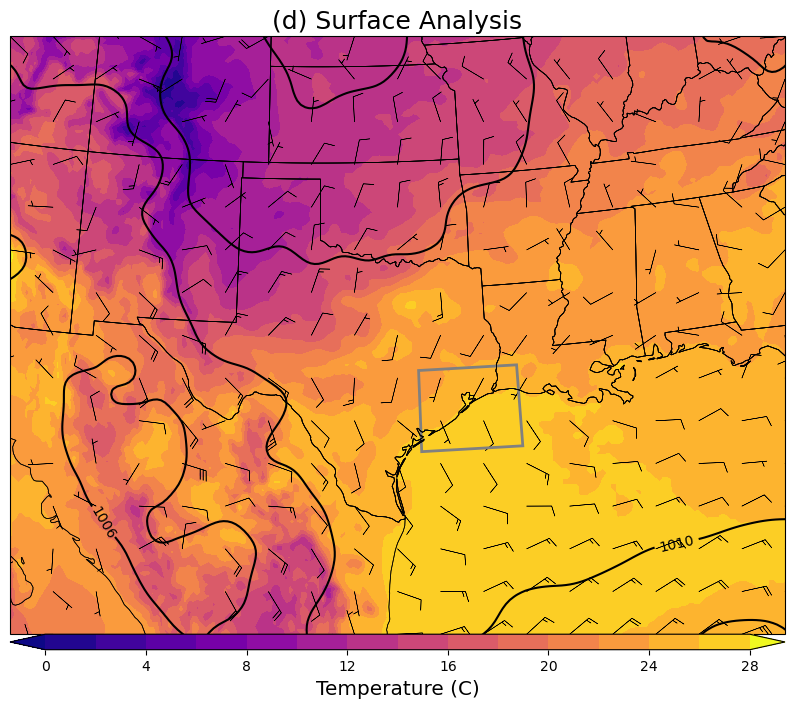

In [25]:
## First we need to define our coordinate system and add all our map features
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = crs)
extent = [250., 275., 22., 40.]
ax.set_extent(extent)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

small_extent = [-93, -96.5 ,28, 30.5]
lon_min, lon_max, lat_min, lat_max = small_extent
rect = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min, linewidth = 2, edgecolor = 'grey', facecolor = 'none', transform = ccrs.PlateCarree())
 
ds_zoom = ds.where(np.logical_and( 
                        np.logical_and(ds.longitude.values <= 280, ds.longitude.values >= 245), 
                        np.logical_and(ds.latitude.values <= 41, ds.latitude.values >= 18)))

dsa_zoom = ds.where(np.logical_and( 
                        np.logical_and(dsa.longitude.values <= 280, dsa.longitude.values >= 245), 
                        np.logical_and(dsa.latitude.values <= 41, dsa.latitude.values >= 18)))

lons, lats = ds_zoom.longitude.values, ds_zoom.latitude.values
lonsa, latsa = dsa_zoom.longitude.values, dsa_zoom.latitude.values

## Get the heights and smooth so that it's not wobbly
press_plot = mpcalc.smooth_gaussian(press, 10)
cs = ax.contour(lonsa, latsa, press_plot, levels = np.arange(990, 1020, 4), colors = 'k', transform = ccrs.PlateCarree())
## contour labels 
plt.clabel(cs)

## do the same thing for temperatures
##temp_plot = mpcalc.smooth_gaussian(temp.data.magnitude[0], 20)
##ts = ax.contour(lons, lats, temp_plot, levels = np.arange(0, 41, 2), colors = 'r', vmin = 0, vmax = 40, transform = ccrs.PlateCarree())
##plt.clabel(ts)

## do the same thing for temperatures
temp_plot = mpcalc.smooth_gaussian(temp.data.magnitude[0], 1)
ts = ax.contourf(lons, lats, temp_plot, levels = np.arange(0, 30, 2), cmap = 'plasma', vmin = 0, vmax = 30, transform = ccrs.PlateCarree(), extend = 'both')

cb2=fig.colorbar(ts, ax=ax, orientation='horizontal', pad=0, aspect=50)
cb2.set_label('Temperature (C)', size='x-large')

## u and v windbarbs
ax.barbs(lons, lats, u.data.magnitude[0], v.data.magnitude[0], regrid_shape=15, length = 6, linewidth = 0.4,  
         sizes = {'emptybarb': 0}, transform = ccrs.PlateCarree())
ax.add_patch(rect)

ax.set_title('(d) Surface Analysis',fontsize = 18)

##plt.savefig('/apple/s0/kem6245/escape/ESCAPE_Figures/Composite Synoptic/Land_surface_analysis')
plt.savefig('/Users/kem6245/Documents/Python Copy/ESCAPE/ESCAPE_Figures/Paper 2/2June22_surface_analysis_shaded_9Z_updated.png', dpi=300)